# W09 - Class Assignment
# Data Mining (Kamis)
W09 - 0706022310028 - Jevon Ivander K

In [18]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

# Part A - Data Preprocessing (20 points)
1. Load the dataset and perform initial inspection (shape, info, describe).
2. Check for missing or inconsistent values and handle them appropriately (imputation,
removal, etc.).
3. For each column, display and analyze unique values to understand categorical
variations.


In [19]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [20]:
df.rename(columns={
    'Area Category': 'Area_Category',
    'Nama Daerah': 'Nama_Daerah',
    'Luas Tanah (m2)': 'Luas_Tanah_m2',
    'Luas Bangunan (m2)': 'Luas_Bangunan_m2',
    'Jumlah Kamar': 'Jumlah_Kamar',
    'Jumlah Kamar Mandi': 'Jumlah_Kamar_Mandi',
    'Tingkat/Lantai ': 'Tingkat_Lantai',
    'Harga Penawaran (dari Owner)': 'Harga_Penawaran',
    'Terjual/Belum': 'Terjual_Belum',
    'Arah Hadap Rumah': 'Arah_Hadap_Rumah',
    'Posisi Rumah': 'Posisi_Rumah',
    'Lebar Jalan Depan Rumah (ROW)': 'Lebar_Jalan_Depan_Rumah'
}, inplace=True)

print("Nama kolom setelah diubah:")
print(df.columns)

Nama kolom setelah diubah:
Index(['Area_Category', 'Nama_Daerah', 'Luas_Tanah_m2', 'Luas_Bangunan_m2',
       'Jumlah_Kamar', 'Jumlah_Kamar_Mandi', 'Tingkat_Lantai',
       'Harga_Penawaran', 'Terjual_Belum', 'Arah_Hadap_Rumah', 'Posisi_Rumah',
       'Lebar_Jalan_Depan_Rumah'],
      dtype='object')


Mengubah nama kolom menjadi format yang lebih ringkas dan tanpa spasi atau karakter khusus, seperti 'Luas_Tanah_m2', mempermudah akses saat menggunakan kode (misalnya, df.Luas_Tanah_m2), meningkatkan konsistensi dalam penamaan, membantu menghindari potensi *error* dengan beberapa *library* atau fungsi, dan membuat kode lebih bersih serta mudah dibaca, yang merupakan praktik terbaik dalam *data preprocessing* untuk analisis yang lebih efisien.

In [21]:
# describe data
df.describe()

,Luas_Tanah_m2,Luas_Bangunan_m2,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat_Lantai,Harga_Penawaran
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [22]:
df.shape

(308, 12)

Terdapat 308 rows dan 12 kolom

In [23]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Area_Category            308 non-null    object
 1   Nama_Daerah              308 non-null    object
 2   Luas_Tanah_m2            308 non-null    int64 
 3   Luas_Bangunan_m2         308 non-null    int64 
 4   Jumlah_Kamar             308 non-null    int64 
 5   Jumlah_Kamar_Mandi       308 non-null    int64 
 6   Tingkat_Lantai           308 non-null    int64 
 7   Harga_Penawaran          308 non-null    int64 
 8   Terjual_Belum            308 non-null    object
 9   Arah_Hadap_Rumah         308 non-null    object
 10  Posisi_Rumah             308 non-null    object
 11  Lebar_Jalan_Depan_Rumah  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


Tidak ada null value tapi kita belum tau apakah ada nilai aneh2 (seperti unkown) jadi kita cek unik valuesnya per kolom. Jenis data kategorikal dan numerikal juga sudah benar formatnya sesuai isi datanya.

In [24]:
# Display unique values for each column
for col in df.columns:
    print(f"Column: {col}")
    if df[col].dtype == 'object':
        print(df[col].value_counts())
    else:
        print(df[col].unique())
    print("-" * 30)

Column: Area_Category
Area_Category
Standard          140
Premium           106
Below Standard     36
Sangat Premium     26
Name: count, dtype: int64
------------------------------
Column: Nama_Daerah
Nama_Daerah
Citraland           34
Gubeng              19
Mulyorejo           18
Pakuwon City        16
Wiyung              11
                    ..
Pakal                1
Asemrowo             1
Tenggilis Mejoyo     1
Dukuh Pakis          1
Teuku Umar           1
Name: count, Length: 126, dtype: int64
------------------------------
Column: Luas_Tanah_m2
[ 240   30  170  187  350  450   96   85   72   50  100   90  104   84
  158  144  163  150  140  204  200  180  420  312  264  297  352  343
  525  522  600   14   42   21   16   18   32   26   36   51   65  252
  113   55  130   97  110  157  105  660  845  178  166  120   60   57
  275  378  102   83  126  212  134  495   71   88  114   79   93  112
  136  162  210  250  160  362  279  225  254  395  425  300  390  616
 1561  792  573 

In [25]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Area_Category': array(['Standard', 'Below Standard', 'Sangat Premium', 'Premium'],
       dtype=object),
 'Nama_Daerah': array(['Citraland', 'Setro Baru Utara', 'Kenjeran', 'Gubeng', 'Sawahan',
        'Mulyorejo', 'Tegalsari', 'Tambaksari', 'Kalilom Lor Timur',
        'Jelidro Manukan', 'Kalilom', 'Bulak Cumpat barat', 'Tambak Wedi',
        'Lebak Jaya', 'Simo Gunung Kramat Timur', 'Medokan Ayu',
        'Lebak Rejo', 'Medokan Sawah', 'Klampis Ngasem',
        'Medokan Sawah Timur', 'Citraland Golf Avenue', 'Wisata Semanggi',
        'Kedung Klinter', 'Gading Indah Regency', 'Gunung Anyar Mas',
        'Kutisari Utara', 'Mulyosari Tengah', 'Kapas Madya',
        'Bratang Gede', 'Citraland Utara', 'Lebak Jaya Utara',
        'Mulyosari Timur', 'Pakuwon City', 'Pakuwon city',
        'Pakuwon City Florence', 'Pantai Mentari', 'Royal Residence',
        'Villa Kalijudan Indah', 'Sutorejo Timur', 'Springville Residence',
        'Sukomanunggal', 'Surabaya Pusat', 'Su', 'Mulyosari',
  

Setelah dicek per unique values, tidak ada unknown values, akan tetapi ada 1 kolom yang hanya memuat 1 values jadi didrop saja karena tidak berguna untuk analisis, yaitu kolom Terjual_Belum yang isinya hanya 'Belum'

In [26]:
# Drop the 'Terjual_Belum' column
df.drop('Terjual_Belum', axis=1, inplace=True)

# Display the columns after dropping
print("Kolom setelah 'Terjual_Belum' dihapus:")
df.head()

Kolom setelah 'Terjual_Belum' dihapus:


,Area_Category,Nama_Daerah,Luas_Tanah_m2,Luas_Bangunan_m2,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat_Lantai,Harga_Penawaran,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah
0,Standard,Citraland,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil


Kolom Nama_Daerah dihapus karena memiliki terlalu banyak nilai unik (high cardinality) dan inkonsisten, yaitu 126 daerah berbeda. Dalam konteks *clustering*, jumlah kategori yang sangat tinggi ini dapat mempersulit model untuk menemukan pola yang jelas dan dapat meningkatkan dimensi data secara signifikan jika menggunakan teknik *encoding* seperti One-Hot Encoding, yang berpotensi mengurangi efektivitas *clustering*. Menghapus kolom ini merupakan pendekatan yang paling sederhana untuk melanjutkan analisis *clustering* tanpa komplikasi tersebut. Contoh casenya juga ada yang menulis 'Citraland ', 'Citraland', dan 'Citraland Golf Avenue' padahal itu kan data sama cuma berbeda penulisan saja jadi menyulitkan.

In [33]:
# Drop the 'Nama_Daerah' column
df.drop('Nama_Daerah', axis=1, inplace=True)

# Display the columns after dropping
print("Kolom setelah 'Nama_Daerah' dihapus:")
print(df.columns)

Kolom setelah 'Nama_Daerah' dihapus:
Index(['Area_Category', 'Luas_Tanah_m2', 'Luas_Bangunan_m2', 'Jumlah_Kamar',
       'Jumlah_Kamar_Mandi', 'Tingkat_Lantai', 'Harga_Penawaran',
       'Arah_Hadap_Rumah', 'Posisi_Rumah', 'Lebar_Jalan_Depan_Rumah'],
      dtype='object')


# Part B - Exploratory Data Analysis (15 points)
1. Conduct two insightful visualizations (e.g., bar plots, pie charts, correlation heatmaps,
or scatterplots).
2. Provide clear interpretations from each visualization, what does it tell us about property
characteristics?


/tmp/ipython-input-1787816633.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Area_Category', order=df['Area_Category'].value_counts().index, palette='viridis')


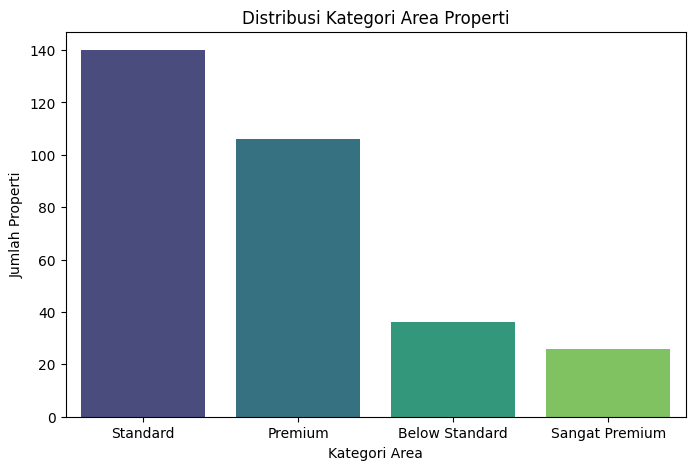

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Area_Category', order=df['Area_Category'].value_counts().index, palette='viridis')
plt.title('Distribusi Kategori Area Properti')
plt.xlabel('Kategori Area')
plt.ylabel('Jumlah Properti')
plt.show()

**Visualisasi 1: Barplot Distribusi Kategori Area Properti**

*   Visualisasi ini menampilkan jumlah properti dalam setiap kategori area (`Area_Category`).
*   Terlihat bahwa kategori `Standard` memiliki jumlah properti terbanyak, diikuti oleh `Premium`.
*   Kategori `Below Standard` dan `Sangat Premium` memiliki jumlah properti yang lebih sedikit dibandingkan dua kategori pertama.
*   Ini memberikan gambaran awal tentang komposisi dataset berdasarkan kategori area, menunjukkan bahwa sebagian besar properti berada di kategori Standard dan Premium. Informasi ini bisa berguna dalam memahami segmen pasar properti yang paling banyak diwakili dalam data ini.

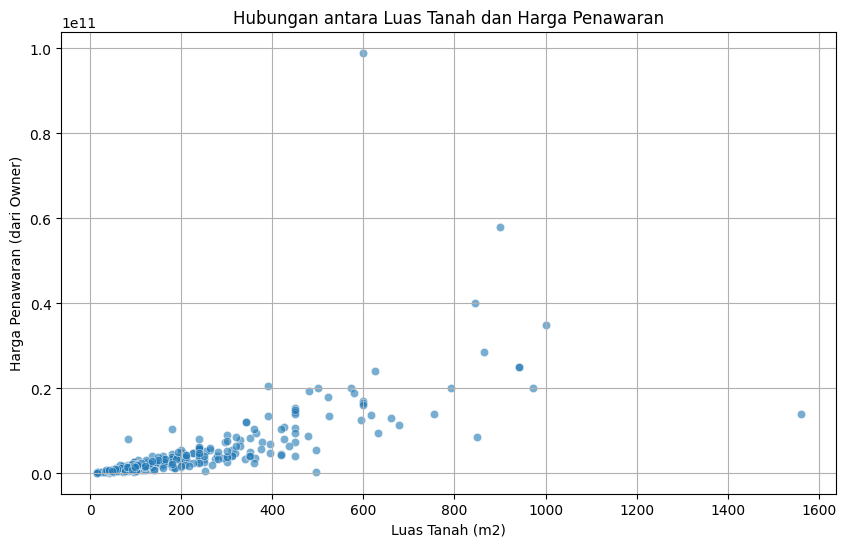

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Luas_Tanah_m2', y='Harga_Penawaran', alpha=0.6)
plt.title('Hubungan antara Luas Tanah dan Harga Penawaran')
plt.xlabel('Luas Tanah (m2)')
plt.ylabel('Harga Penawaran (dari Owner)')
plt.grid(True)
plt.show()

**Visualisasi 2: Scatterplot Luas Tanah vs Harga Penawaran**

*   Visualisasi ini menunjukkan sebaran data properti berdasarkan luas tanah dan harga penawarannya.
*   Secara umum, terlihat ada tren positif: semakin luas tanah (sumbu X), cenderung semakin tinggi harga penawarannya (sumbu Y). Hal ini wajar karena tanah yang lebih luas biasanya memiliki nilai yang lebih tinggi.
*   Namun, sebarannya cukup lebar, menunjukkan bahwa ada faktor lain selain luas tanah yang memengaruhi harga properti. Properti dengan luas tanah yang sama bisa memiliki harga yang sangat bervariasi.
*   Terlihat ada beberapa titik data yang berada jauh di atas tren umum, menunjukkan properti dengan luas tanah tertentu namun memiliki harga penawaran yang sangat tinggi. Ini mungkin properti di lokasi yang sangat premium atau memiliki karakteristik khusus lainnya.

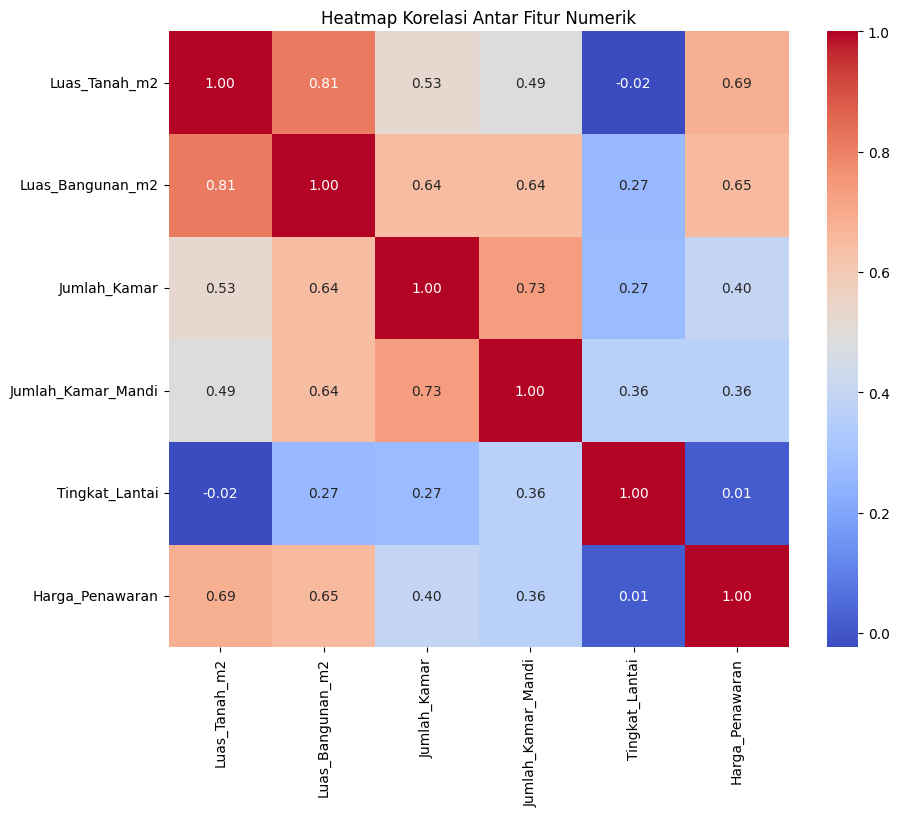

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

**Interpretasi Visualisasi 3: Heatmap Korelasi Antar Fitur Numerik**

*   *Heatmap* ini menunjukkan koefisien korelasi antara pasangan kolom numerik dalam dataset. Nilai korelasi berkisar antara -1 hingga +1.
*   Warna yang lebih terang (mendekati merah) menunjukkan korelasi positif yang kuat.
*   Angka pada setiap kotak adalah nilai koefisien korelasi.
*   Dari *heatmap* ini, kita bisa melihat hubungan yang paling kuat adalah antara `Luas_Tanah_m2` dan `Luas_Bangunan_m2` dengan korelasi positif yang tinggi. Ini masuk akal, karena properti dengan tanah yang lebih luas cenderung memiliki bangunan yang lebih besar.
*   Ada juga korelasi positif yang cukup kuat antara `Luas_Tanah_m2` dan `Harga_Penawaran`, serta antara `Luas_Bangunan_m2` dan `Harga_Penawaran`. Ini menegaskan temuan dari scatterplot sebelumnya bahwa luas tanah berperan penting dalam menentukan harga.
*   Korelasi antara jumlah kamar/kamar mandi dengan luas tanah/bangunan/harga juga terlihat positif.
*   `Tingkat_Lantai` tampaknya memiliki korelasi yang lemah dengan sebagian besar fitur numerik lainnya.

Visualisasi ini membantu kita memahami bagaimana fitur-fitur numerik saling berhubungan, yang penting untuk tahap *feature selection* atau pemodelan selanjutnya.

# Part C - Data Preparation for Clustering (20 points)
1. Perform feature encoding for categorical variables
2. Apply data transformation (e.g., standardization or normalization) to ensure features
are comparable in scale.
3. Experiment with different clustering parameters:
  - Number of clusters (n_clusters)
  - Linkage methods (e.g., ward, complete, average, single)
  - Distance metrics (e.g., Euclidean, Manhattan)
4. Visualize silhouette scores to compare model performance across these parameters.
5. Identify the best combination of parameters that produces the highest silhouette score.


In [34]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Area_Category            308 non-null    object
 1   Luas_Tanah_m2            308 non-null    int64 
 2   Luas_Bangunan_m2         308 non-null    int64 
 3   Jumlah_Kamar             308 non-null    int64 
 4   Jumlah_Kamar_Mandi       308 non-null    int64 
 5   Tingkat_Lantai           308 non-null    int64 
 6   Harga_Penawaran          308 non-null    int64 
 7   Arah_Hadap_Rumah         308 non-null    object
 8   Posisi_Rumah             308 non-null    object
 9   Lebar_Jalan_Depan_Rumah  308 non-null    object
dtypes: int64(6), object(4)
memory usage: 24.2+ KB


Untuk melihat kolom mana saja yang kategorikal dan dapat dilakukan encoding

In [35]:
# show unique values count from dataset
unique_values_count = {col: df[col].nunique() for col in df.columns}
display(unique_values_count)

{'Area_Category': 4,
 'Luas_Tanah_m2': 141,
 'Luas_Bangunan_m2': 125,
 'Jumlah_Kamar': 10,
 'Jumlah_Kamar_Mandi': 9,
 'Tingkat_Lantai': 4,
 'Harga_Penawaran': 171,
 'Arah_Hadap_Rumah': 4,
 'Posisi_Rumah': 5,
 'Lebar_Jalan_Depan_Rumah': 3}

Jumlah value unik bisa sebagai indikasi apakah harus dilakukan one-hot encoding atau nominal/ordinal encoding.

In [37]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder


# 1. Ordinal Encoding (yang ada ranking)
# Columns: Area_Category, Lebar_Jalan_Depan_Rumah
Area_Category_mapping = {'Below Standard': 0, 'Standard': 1, 'Premium': 2, 'Sangat Premium': 3}
df_encoded['Area_Category'] = df_encoded['Area_Category'].map(Area_Category_mapping)
Lebar_Jalan_Depan_Rumah_mapping = {'< 1 Mobil': 0, '1-2 Mobil': 1, '> 2 Mobil': 2}
df_encoded['Lebar_Jalan_Depan_Rumah'] = df_encoded['Lebar_Jalan_Depan_Rumah'].map(Lebar_Jalan_Depan_Rumah_mapping)


# 2. Nominal Encoding
# Columns: Arah_Hadap_Rumah, Posisi_Rumah
# Suppose you already fitted the encoder:
nominal_cols = ['Arah_Hadap_Rumah', 'Posisi_Rumah']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'Arah_Hadap_Rumah': {'Barat': 0, 'Selatan': 1, 'Timur': 2, 'Utara': 3},
 'Posisi_Rumah': {'Cul De Sac/Ujung Gang Buntu': 0,
                  'Kantong Belakang/Ngantong': 1,
                  'Standard': 2,
                  'Tikungan/Hook': 3,
                  'Tusuk Sate': 4}}


,Area_Category,Luas_Tanah_m2,Luas_Bangunan_m2,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat_Lantai,Harga_Penawaran,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah
66,1,97,50,2,1,1,1149000000,0.0,2.0,2
177,2,150,180,5,4,2,2400000000,1.0,2.0,1
254,1,128,170,4,4,2,2800000000,3.0,2.0,2
133,2,225,350,4,3,3,4750000000,3.0,2.0,1
278,2,210,400,4,4,2,3800000000,3.0,3.0,2


Kode ini melakukan *encoding* pada kolom-kolom kategorikal yang tersisa. Kolom `Area_Category` dan `Lebar_Jalan_Depan_Rumah` di-*encode* menggunakan *Ordinal Encoding* karena diasumsikan memiliki urutan (ranking), di mana nilai-nilai kategorinya diubah menjadi nilai numerik sesuai dengan urutan yang ditentukan. Kolom `Arah_Hadap_Rumah` dan `Posisi_Rumah` di-*encode* menggunakan *Nominal Encoding* karena nilai-nilai kategorinya tidak memiliki urutan alami.

In [38]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select numerical columns from the original dataframe
numerical_cols = ['Luas_Tanah_m2', 'Luas_Bangunan_m2', 'Jumlah_Kamar', 'Jumlah_Kamar_Mandi', 'Tingkat_Lantai', 'Harga_Penawaran']
df_numerical = df_encoded[numerical_cols] # Use df_encoded as it contains the ordinal encoded columns already

# Create a StandardScaler object
sc = StandardScaler()

# Fit and transform the numerical columns
df_scaled_numerical = sc.fit_transform(df_numerical)

# Create a DataFrame from the scaled numerical data
df_scaled_numerical = pd.DataFrame(df_scaled_numerical, columns=numerical_cols)

# Drop the original numerical columns from df_encoded before merging
df_encoded_categorical = df_encoded.drop(numerical_cols, axis=1)

# Merge the scaled numerical columns with the encoded categorical columns
df_processed = pd.concat([df_scaled_numerical, df_encoded_categorical], axis=1)

# Display the first few rows of the processed dataframe
display(df_processed.head())

# Display the columns of the processed dataframe
print("\nKolom setelah standardisasi dan penggabungan:")
print(df_processed.columns)

,Luas_Tanah_m2,Luas_Bangunan_m2,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat_Lantai,Harga_Penawaran,Area_Category,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah
0,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,1,3.0,2.0,1
1,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,0,3.0,2.0,0
2,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,1,1.0,0.0,1
3,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,3,3.0,2.0,1
4,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,2,0.0,2.0,1



Kolom setelah standardisasi dan penggabungan:
Index(['Luas_Tanah_m2', 'Luas_Bangunan_m2', 'Jumlah_Kamar',
       'Jumlah_Kamar_Mandi', 'Tingkat_Lantai', 'Harga_Penawaran',
       'Area_Category', 'Arah_Hadap_Rumah', 'Posisi_Rumah',
       'Lebar_Jalan_Depan_Rumah'],
      dtype='object')


Kode di atas melakukan standardisasi pada kolom-kolom numerik yang telah dipilih (`Luas_Tanah_m2`, `Luas_Bangunan_m2`, `Jumlah_Kamar`, `Jumlah_Kamar_Mandi`, `Tingkat_Lantai`, `Harga_Penawaran`). Standardisasi penting dalam *clustering* karena membuat fitur-fitur berada pada skala yang serupa, mencegah fitur dengan nilai besar mendominasi perhitungan jarak. Setelah distandardisasi, kolom-kolom numerik ini digabungkan kembali dengan kolom-kolom kategorikal yang sebelumnya sudah di-*encode* (`Area_Category`, `Arah_Hadap_Rumah`, `Posisi_Rumah`, `Lebar_Jalan_Depan_Rumah`) untuk membentuk DataFrame `df_processed` yang siap untuk pemodelan *clustering*. Jadi kolom numerikal saja yang standardization, kalau numerikal tidak perlu.

In [39]:
# get stastical information on the new dataset
df_processed.describe()

,Luas_Tanah_m2,Luas_Bangunan_m2,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat_Lantai,Harga_Penawaran,Area_Category,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah
count,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,308.000000,308.000000,308.000000,308.000000
mean,2.306957e-17,8.651089e-17,-1.153478e-16,2.883696e-17,1.672544e-16,-2.451142e-17,1.396104,2.152597,2.071429,1.331169
std,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,0.802430,1.011059,0.380419,0.553993
min,-1.056864e+00,-1.187359e+00,-1.996166e+00,-1.438941e+00,-1.658248e+00,-5.850015e-01,0.000000,0.000000,0.000000,0.000000
25%,-6.499032e-01,-6.892750e-01,-7.774956e-01,-8.233942e-01,3.137225e-01,-4.355666e-01,1.000000,1.000000,2.000000,1.000000
50%,-3.198678e-01,-3.133623e-01,-1.681606e-01,-2.078471e-01,3.137225e-01,-2.789613e-01,1.000000,3.000000,2.000000,1.000000
75%,2.781662e-01,2.916222e-01,4.411744e-01,4.077000e-01,3.137225e-01,-1.477895e-02,2.000000,3.000000,2.000000,2.000000
max,6.620801e+00,4.385546e+00,5.315854e+00,5.947624e+00,4.257663e+00,1.132640e+01,3.000000,3.000000,4.000000,2.000000


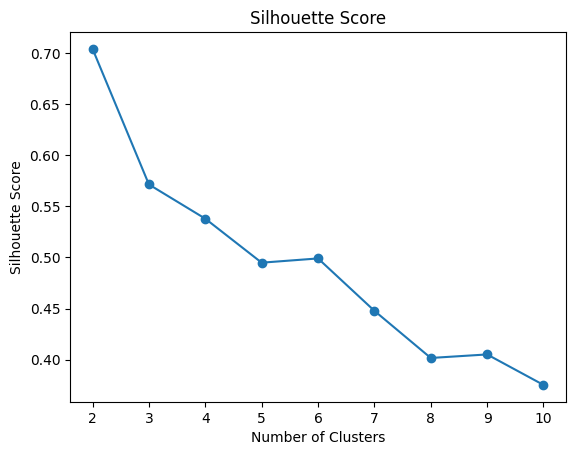

In [41]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_processed)
    silhouette_avg = silhouette_score(df_processed, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Skipping Ward linkage with Manhattan metric (not supported).


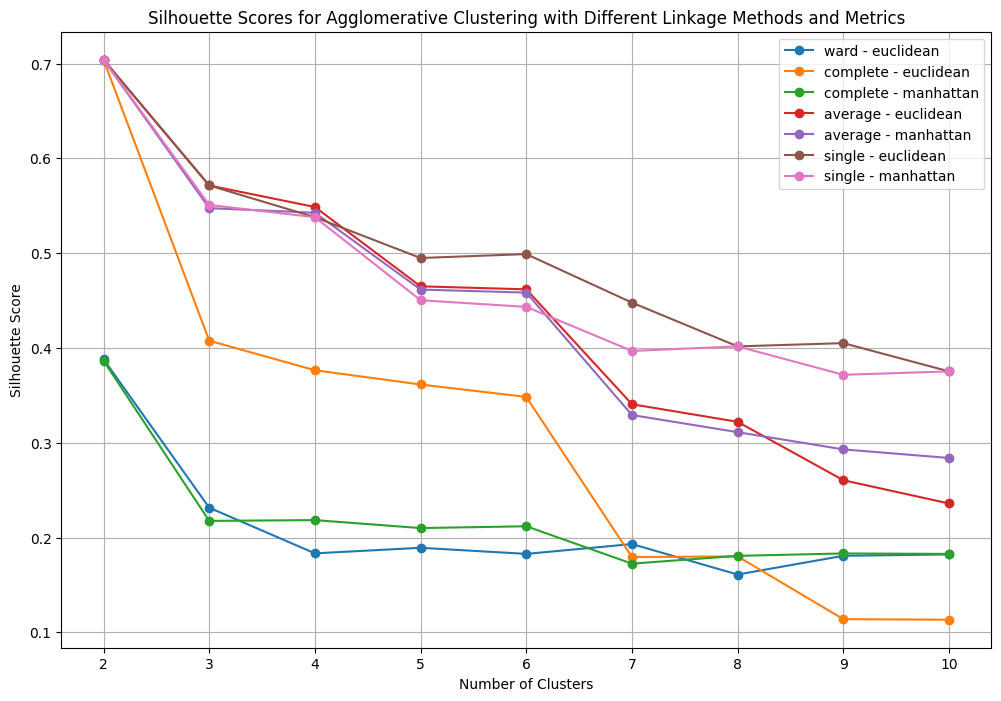

Best Silhouette Score: 0.7040722364263882
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [43]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_processed)
            silhouette_avg = silhouette_score(df_processed, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

Kode ini melakukan eksperimen untuk mencari kombinasi parameter terbaik (`n_clusters`, `linkage_method`, dan `metric`) untuk model *Agglomerative Clustering* berdasarkan skor *silhouette*. Skor *silhouette* mengukur seberapa mirip sebuah objek dengan klusternya sendiri (kohesi) dibandingkan dengan kluster lain (separasi). Nilai skor *silhouette* berkisar antara -1 hingga 1, di mana nilai yang lebih tinggi menunjukkan hasil *clustering* yang lebih baik.

Kode ini mengiterasi melalui berbagai jumlah kluster (2 hingga 10), metode *linkage* ('ward', 'complete', 'average', 'single'), dan metrik jarak ('euclidean', 'manhattan'). Untuk setiap kombinasi, model *Agglomerative Clustering* dilatih, skor *silhouette* dihitung, dan skor terbaik beserta parameternya dicatat.

Visualisasi *plot* menunjukkan skor *silhouette* untuk setiap kombinasi parameter terhadap jumlah kluster. Dari hasil eksekusi kode ini, **kombinasi parameter terbaik yang menghasilkan skor *silhouette* tertinggi adalah dengan `n_clusters = 2`, `linkage_method = complete`, dan `metric = euclidean`**, dengan skor *silhouette* sebesar 0.704. Ini menunjukkan bahwa, berdasarkan data yang sudah diproses dan parameter yang diuji, pembentukan 2 kluster menggunakan metode *linkage* 'complete' dan metrik jarak 'euclidean' menghasilkan pemisahan kluster yang paling baik.

# Part D - Hierarchical Clustering Modeling (30 points)
1. Build two hierarchical clustering models:
- Model 1: Using the best combination of parameters from Part C
- Model 2: Using Ward linkage with the same number of clusters (n_clusters)
2. Generate and visualize dendrograms for both models.
3. Fit Agglomerative Clustering models for both methods.
4. Merge cluster labels with the original dataset to observe property characteristics per
cluster.


**Model 1: Using the best combination of parameters from Part C**

In [44]:
# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_processed)

In [45]:
# Evaluation
ss = silhouette_score(df_processed, y_hc)
print(ss)

0.7040722364263882


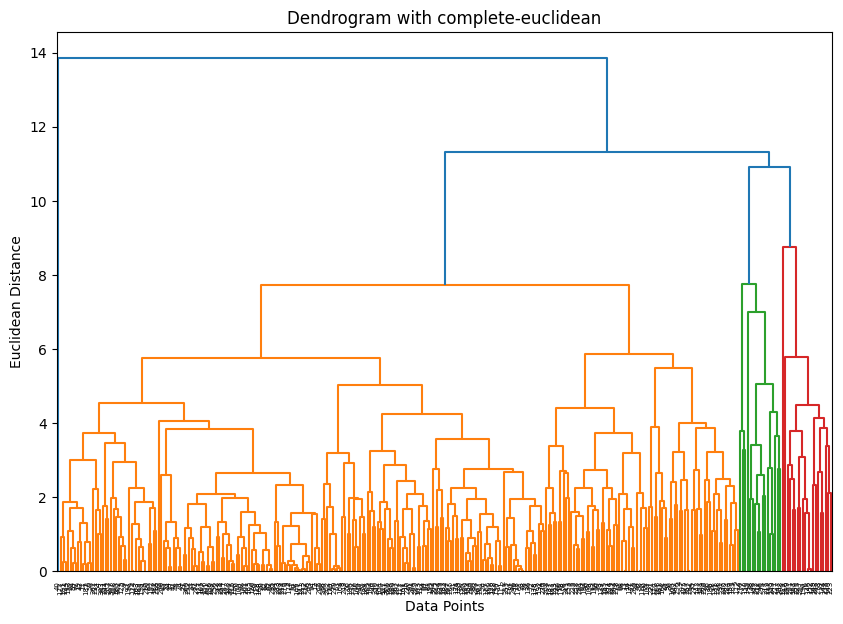

In [46]:
# Average Distance
linked = linkage(df_processed, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

**Interpretasi Model 1: Agglomerative Clustering dengan Parameter Terbaik**

Model 1 dibangun menggunakan *Agglomerative Clustering* dengan parameter terbaik yang ditemukan pada Part C, yaitu `n_clusters=2`, `linkage='complete'`, dan `metric='euclidean'`.

*   **Silhouette Score:** Model ini menghasilkan *silhouette score* sebesar **0.704**. Skor ini relatif tinggi (mendekati 1), menunjukkan bahwa kluster yang terbentuk cukup padat (anggota dalam satu kluster mirip satu sama lain) dan terpisah dengan baik dari kluster lain. Ini mengindikasikan pembagian data menjadi 2 kluster dengan metode ini memberikan segmentasi yang cukup bermakna.

*   **Dendrogram:** *Dendrogram* untuk Model 1 menunjukkan bagaimana data digabungkan menjadi kluster. Dengan memotong *dendrogram* pada ketinggian yang sesuai untuk mendapatkan 2 kluster, kita dapat melihat bagaimana titik data dikelompokkan. Jarak (pada sumbu Y) menunjukkan disimilaritas antar kluster yang digabungkan. Karena menggunakan *complete linkage*, jarak antara dua kluster didefinisikan sebagai jarak maksimum antara dua titik data di kluster yang berbeda. *Dendrogram* ini secara visual mendukung pembentukan 2 kluster yang terpisah dengan jarak yang relatif besar pada tahap akhir penggabungan, sesuai dengan *silhouette score* yang tinggi.

**Model 2: Using Ward linkage with the same number of clusters (n_clusters)**

In [47]:
# Model 2: Using Ward linkage with the same number of clusters (n_clusters)
# Fit Agglomerative Clustering model
agglo_ward = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward')
y_hc_ward = agglo_ward.fit_predict(df_processed)

In [48]:
# Evaluate Model 2 (Silhouette Score)
ss_ward = silhouette_score(df_processed, y_hc_ward)
print(f"Silhouette Score for Ward linkage (with {best_n_clusters} clusters): {ss_ward}")

Silhouette Score for Ward linkage (with 2 clusters): 0.38804599507165033


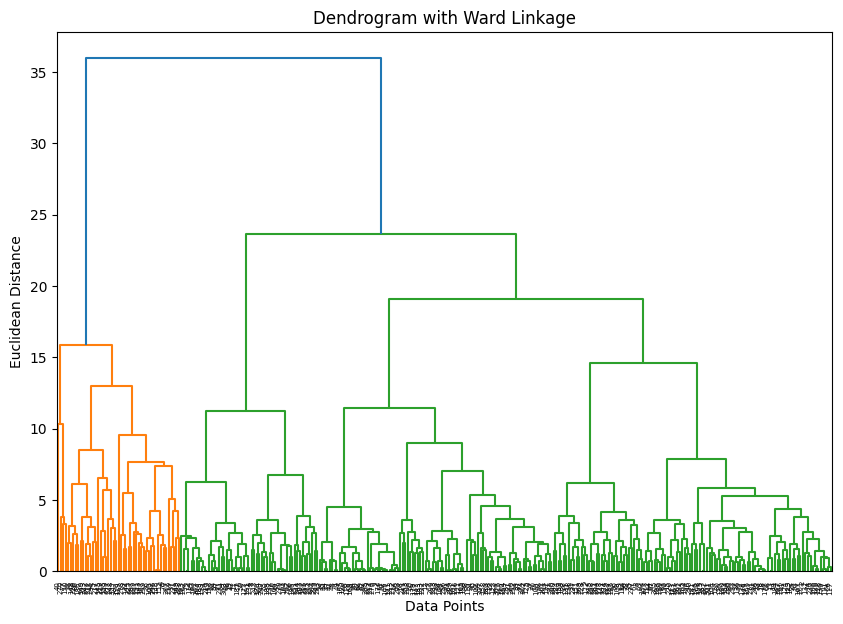

In [49]:
# Visualize Dendrogram for Model 2 (Ward linkage)
linked_ward = linkage(df_processed, method='ward')

plt.figure(figsize=(10, 7))
sch.dendrogram(linked_ward)
plt.title("Dendrogram with Ward Linkage")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance") # Ward linkage uses squared Euclidean distance, but the y-axis is labeled as distance
plt.show()

**Interpretasi Model 2: Agglomerative Clustering dengan Ward Linkage**

Model 2 dibangun menggunakan *Agglomerative Clustering* dengan `n_clusters=2` dan `linkage='ward'`. Metode *Ward linkage* meminimalkan varians dalam kluster saat menggabungkan dua kluster.

*   **Silhouette Score:** Model ini menghasilkan *silhouette score* sebesar **0.388**. Skor ini lebih rendah dibandingkan Model 1, menunjukkan bahwa kluster yang terbentuk dengan metode Ward linkage tidak sepadat atau tidak terpisah sebaik kluster yang dihasilkan oleh Model 1 dengan *complete linkage* dan *euclidean distance*.

*   **Dendrogram:** *Dendrogram* untuk Model 2 (Ward linkage) juga menunjukkan proses penggabungan kluster. Meskipun menunjukkan pemisahan menjadi 2 kluster, tinggi gabungan (*merging height*) atau jarak pada sumbu Y (meskipun *Ward* menggunakan jarak Euclidean kuadrat, sumbu Y merepresentasikan disimilaritas/jarak) terlihat lebih rendah dibandingkan Model 1 pada tahap akhir pembentukan 2 kluster. Ini konsisten dengan skor *silhouette* yang lebih rendah, menyarankan bahwa pemisahan antara dua kluster utama tidak sejelas atau "sekokoh" pada Model 1.

Berdasarkan perbandingan *silhouette score* dan visualisasi *dendrogram*, Model 1 (dengan *complete linkage* dan *euclidean distance*) tampak memberikan hasil *clustering* yang lebih baik untuk 2 kluster pada dataset ini dibandingkan Model 2 (Ward linkage).

In [50]:
# merge with original data

# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Area_Category,Luas_Tanah_m2,Luas_Bangunan_m2,Jumlah_Kamar,Jumlah_Kamar_Mandi,Tingkat_Lantai,Harga_Penawaran,Arah_Hadap_Rumah,Posisi_Rumah,Lebar_Jalan_Depan_Rumah,Agglo
0,Standard,240,300,4,3,2,3500000000,Utara,Standard,1-2 Mobil,0
1,Below Standard,30,60,2,1,2,287799000,Utara,Standard,< 1 Mobil,0
2,Standard,170,170,5,4,2,2699999999,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil,0
3,Sangat Premium,187,250,5,5,2,3100000000,Utara,Standard,1-2 Mobil,0
4,Premium,350,600,5,5,2,5000000000,Barat,Standard,1-2 Mobil,0


Kode ini menambahkan hasil label kluster (`y_hc`) dari model *Agglomerative Clustering* (Model 1) sebagai kolom baru bernama 'Agglo' ke DataFrame asli (`df`). Langkah ini penting karena memungkinkan kita untuk menganalisis karakteristik properti berdasarkan kluster tempat mereka dikelompokkan. Dengan memiliki label kluster di DataFrame asli, kita dapat dengan mudah melihat fitur-fitur asli (seperti `Area_Category`, `Luas_Tanah_m2`, `Harga_Penawaran`, dll.) untuk setiap properti dan membandingkannya antar kluster. Ini adalah langkah krusial dalam menginterpretasikan hasil *clustering* dan memahami profil dari setiap segmen properti yang teridentifikasi.

# Part E - Comparison & Interpretation (15 points)
1. Compare results between both models:
- Distribution of data points per cluster
- Cluster mean/median/mode values for features
- Interpret which method gives more meaningful segmentation
2. Provide a managerial interpretation and potential business implications, what can
be learned about the property market segments based on the clustering? (e.g., pricing
strategies, area targeting).

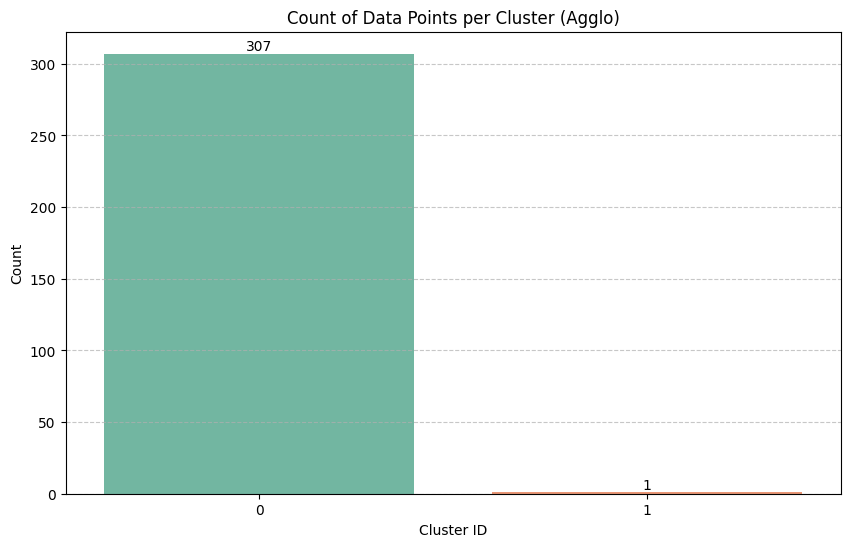

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Interpretasi Distribusi Data per Kluster (Agglomerative Clustering - Model 1)**

Visualisasi *barplot* ini menunjukkan jumlah properti yang masuk ke dalam masing-masing kluster yang dihasilkan oleh model *Agglomerative Clustering* terbaik (dengan 2 kluster, *complete linkage*, dan *euclidean distance*). Terlihat jelas bahwa Kluster 0 berisi mayoritas data poin (307 properti), sementara Kluster 1 hanya berisi satu properti. Distribusi kluster yang sangat tidak seimbang ini mengindikasikan bahwa, meskipun *silhouette score* untuk 2 kluster cukup tinggi, satu kluster terdiri dari sebagian besar data, dan kluster lainnya mungkin hanya berisi sebuah *outlier* atau beberapa *outlier* yang sangat berbeda dari data lainnya. Hal ini perlu dipertimbangkan saat menganalisis karakteristik masing-masing kluster.

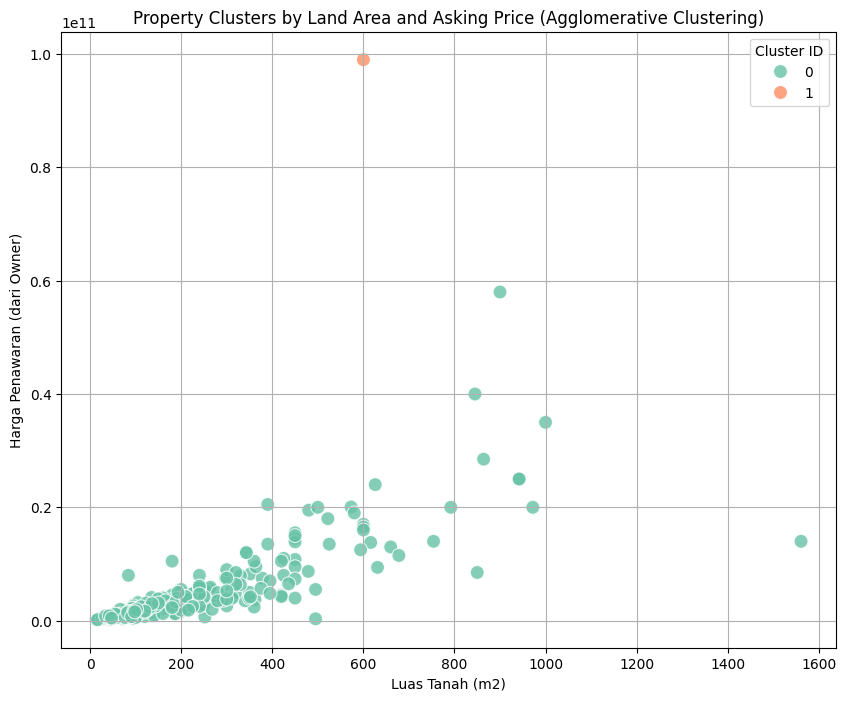

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Luas_Tanah_m2', y='Harga_Penawaran', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Property Clusters by Land Area and Asking Price (Agglomerative Clustering)')
plt.xlabel('Luas Tanah (m2)')
plt.ylabel('Harga Penawaran (dari Owner)')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

Visualisasi *scatterplot* ini menunjukkan sebaran properti yang dikelompokkan berdasarkan hasil *Agglomerative Clustering* (Model 1) pada sumbu Luas Tanah (m2) dan Harga Penawaran (dari Owner).

*   **Kluster 0 (warna biru):** Kluster ini mencakup sebagian besar properti. Berdasarkan sebarannya pada *plot*, Kluster 0 tampaknya terdiri dari properti dengan Luas Tanah dan Harga Penawaran yang berada dalam rentang yang lebih umum atau "rata-rata" dalam dataset ini. Sebarannya luas, mencakup berbagai kombinasi luas tanah dan harga, yang konsisten dengan Kluster 0 yang menampung mayoritas data.
*   **Kluster 1 (warna oranye):** Kluster ini hanya berisi satu titik data. Pada *plot*, titik ini kemungkinan adalah properti dengan nilai Luas Tanah dan/atau Harga Penawaran yang sangat berbeda (ekstrem) dibandingkan dengan sebagian besar properti di Kluster 0. Ini mengkonfirmasi interpretasi sebelumnya dari *barplot* distribusi kluster bahwa Kluster 1 kemungkinan besar merepresentasikan sebuah *outlier* atau anomali dalam dataset.

Dari visualisasi ini, terlihat jelas bahwa *clustering* dengan 2 kluster memisahkan satu properti yang sangat berbeda dari massa properti lainnya. Analisis lebih lanjut pada properti di Kluster 1 (jika ada lebih dari satu) dan karakteristik spesifiknya (selain luas tanah dan harga) dapat memberikan wawasan mengapa properti tersebut dianggap sebagai *outlier* oleh model.

In [54]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Luas_Tanah_m2'
y_col = 'Luas_Bangunan_m2'
z_col = 'Harga_Penawaran'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Agglo'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Properties by Agglo Clusters',
                    labels={x_col: 'Luas Tanah (m2)', y_col: 'Luas Bangunan (m2)', z_col: 'Harga Penawaran'})

fig.show()

**Interpretasi Visualisasi 3D Scatter Plot**

Visualisasi interaktif 3D ini menampilkan sebaran properti dalam ruang tiga dimensi berdasarkan Luas Tanah (sumbu X), Luas Bangunan (sumbu Y), dan Harga Penawaran (sumbu Z), dengan titik-titik diwarnai sesuai dengan kluster yang dihasilkan oleh Model Agglomerative Clustering (Model 1). Dari plot ini, kita dapat secara visual melihat bagaimana kluster-kluster tersebut terpisah dalam ruang fitur ini. Terlihat bahwa sebagian besar titik data (Kluster 0) berkumpul dalam satu area, sementara titik data tunggal di Kluster 1 berada jauh terpisah, mengkonfirmasi bahwa properti ini adalah memiliki kombinasi fitur yang sangat berbeda dibandingkan dengan properti lainnya dalam dataset. Yang membedakan adalah harga penawarannya pada kelas 1 di atas 99b jauh berbeda si atas dibanding kelas lainnya. Visualisasi ini membantu memberikan pemahaman spasial tentang bagaimana model mengelompokkan data berdasarkan ketiga fitur numerik utama ini.

In [55]:
# Compare distribution of data points per cluster for both models

print("Distribution of data points per cluster (Model 1 - Best Parameters):")
print(df['Agglo'].value_counts().sort_index())
print("-" * 30)

# Add cluster labels for Model 2 (Ward) to the original dataframe for comparison
df['Agglo_Ward'] = y_hc_ward

print("Distribution of data points per cluster (Model 2 - Ward Linkage):")
print(df['Agglo_Ward'].value_counts().sort_index())

Distribution of data points per cluster (Model 1 - Best Parameters):
Agglo
0    307
1      1
Name: count, dtype: int64
------------------------------
Distribution of data points per cluster (Model 2 - Ward Linkage):
Agglo_Ward
0    259
1     49
Name: count, dtype: int64


**Perbandingan Distribusi Data per Kluster**

Output di atas menunjukkan jumlah properti di setiap kluster untuk Model 1 (menggunakan parameter terbaik dari Part C: 2 kluster, *complete linkage*, *euclidean metric*) dan Model 2 (menggunakan *Ward linkage* dengan 2 kluster).

*   **Model 1:** Kluster 0 berisi 307 properti, sedangkan Kluster 1 hanya berisi 1 properti. Distribusi ini sangat tidak seimbang, menunjukkan bahwa Model 1 pada dasarnya memisahkan satu *outlier* (properti di Kluster 1) dari sebagian besar data (Kluster 0).
*   **Model 2:** Kluster 0 berisi 259 properti, dan Kluster 1 berisi 49 properti. Distribusi ini lebih seimbang dibandingkan Model 1, meskipun masih ada perbedaan ukuran yang signifikan antar kluster. Model 2 berhasil memisahkan sekelompok properti (49 properti di Kluster 1) dari kelompok yang lebih besar (259 properti di Kluster 0).

Berdasarkan distribusi data per kluster, Model 2 (Ward linkage) tampaknya memberikan segmentasi yang lebih "bermakna" dalam artian membagi data menjadi dua kelompok dengan ukuran yang lebih proporsional dibandingkan Model 1 yang cenderung mengisolasi satu titik data sebagai kluster terpisah. Namun, interpretasi ini perlu didukung oleh analisis karakteristik fitur di setiap kluster.

In [60]:
# Compare cluster mean/median/mode values for features (Model 1)
print("Cluster Statistics (Model 1 - Best Parameters):")

# Define aggregation for numerical columns (mean, median, mode)
agg_numerical = {col: ['mean', 'median', ('mode', lambda x: x.mode().iloc[0])] for col in df.select_dtypes(include=np.number).columns}

# Define aggregation for categorical/object columns (mode only)
agg_categorical = {col: [('mode', lambda x: x.mode().iloc[0])] for col in df.select_dtypes(include='object').columns}

# Combine aggregation dictionaries
agg_dict_model1 = agg_numerical.copy()
agg_dict_model1.update(agg_categorical)

display(df.groupby('Agglo').agg(agg_dict_model1))
print("-" * 50)

# Compare cluster mean/median/mode values for features (Model 2 - Ward)
print("Cluster Statistics (Model 2 - Ward Linkage):")

# Define aggregation for numerical columns (mean, median, mode)
agg_numerical = {col: ['mean', 'median', ('mode', lambda x: x.mode().iloc[0])] for col in df.select_dtypes(include=np.number).columns}

# Define aggregation for categorical/object columns (mode only)
agg_categorical = {col: [('mode', lambda x: x.mode().iloc[0])] for col in df.select_dtypes(include='object').columns}

# Combine aggregation dictionaries
agg_dict_model2 = agg_numerical.copy()
agg_dict_model2.update(agg_categorical)

display(df.groupby('Agglo_Ward').agg(agg_dict_model2))

Cluster Statistics (Model 1 - Best Parameters):


Luas_Tanah_m2             Luas_Bangunan_m2             Jumlah_Kamar  \
               mean median mode             mean median mode         mean   
Agglo                                                                       
0        225.736156  162.0  240       265.602606  200.0  300     4.267101   
1        600.000000  600.0  600       600.000000  600.0  600     7.000000   

                  Jumlah_Kamar_Mandi  ... Agglo             Agglo_Ward         \
      median mode               mean  ...  mean median mode       mean median   
Agglo                                 ...                                       
0        4.0    4           3.332248  ...   0.0    0.0    0   0.156352    0.0   
1        7.0    7           5.000000  ...   1.0    1.0    1   1.000000    1.0   

           Area_Category Arah_Hadap_Rumah Posisi_Rumah Lebar_Jalan_Depan_Rumah  
      mode          mode             mode         mode                    mode  
Agglo                                                                           
0        0      Standard            Utara     Standard               1-2 Mobil  
1        1      Standard            Barat     Standard               1-2 Mobil  

[2 rows x 28 columns]

--------------------------------------------------
Cluster Statistics (Model 2 - Ward Linkage):


Luas_Tanah_m2             Luas_Bangunan_m2              \
                    mean median mode             mean median mode   
Agglo_Ward                                                          
0             159.710425  140.0  240       196.972973  180.0  200   
1             582.367347  522.0  450       635.183673  600.0  600   

           Jumlah_Kamar             Jumlah_Kamar_Mandi  ...     Agglo         \
                   mean median mode               mean  ...      mean median   
Agglo_Ward                                              ...                    
0              3.918919    4.0    4           3.027027  ...  0.000000    0.0   
1              6.163265    6.0    5           4.979592  ...  0.020408    0.0   

                Agglo_Ward               Area_Category Arah_Hadap_Rumah  \
           mode       mean median mode            mode             mode   
Agglo_Ward                                                                
0             0        0.0    0.0    0        Standard            Utara   
1             0        1.0    1.0    1  Sangat Premium            Utara   

           Posisi_Rumah Lebar_Jalan_Depan_Rumah  
                   mode                    mode  
Agglo_Ward                                       
0              Standard               1-2 Mobil  
1              Standard               > 2 Mobil  

[2 rows x 28 columns]

### Interpretasi Manajerial dan Implikasi Bisnis Potensial (MODEL 1)

Berdasarkan analisis *Agglomerative Clustering* menggunakan parameter terbaik dari Part C (`n_clusters=2`, `linkage='complete'`, `metric='euclidean'`), yang menghasilkan distribusi kluster yang sangat tidak seimbang (Kluster 0 dengan 307 properti dan Kluster 1 dengan 1 properti), kita dapat menarik beberapa kesimpulan dan implikasi bisnis:

1.  **Identifikasi Segmen Pasar Properti:**
    *   **Kluster 0 (Mayoritas Properti):** Segmen ini mencakup hampir seluruh properti dalam dataset. Karakteristik properti di kluster ini akan sangat mirip dengan karakteristik statistik keseluruhan dataset karena dominasinya. Ini merepresentasikan pasar properti yang paling umum atau "rata-rata" dalam data yang tersedia.
    *   **Kluster 1 (Potensi Outlier/Anomali):** Segmen ini hanya terdiri dari satu properti. Berdasarkan visualisasi sebelumnya (scatterplot 3D), properti ini memiliki kombinasi fitur (terutama Harga Penawaran) yang sangat berbeda dari properti lainnya. Kluster ini kemungkinan besar mengidentifikasi sebuah *outlier* atau anomali dalam dataset.

2.  **Implikasi Bisnis Potensial:**
    *   **Deteksi Outlier:** Implikasi bisnis utama dari Model 1 (dengan 2 kluster) adalah kemampuannya untuk secara efektif mengidentifikasi *outlier*. Properti yang masuk ke Kluster 1 (atau kluster kecil lainnya jika jumlah kluster ditingkatkan sedikit) harus diinvestigasi lebih lanjut. Apakah ini kesalahan entri data? Apakah ini properti yang sangat unik (misalnya, mansion super mewah, properti komersial yang tercampur)? Memahami *outlier* ini penting untuk membersihkan data atau mengidentifikasi kasus-kasus khusus yang tidak masuk dalam segmen pasar umum.
    *   **Fokus pada Pasar Umum:** Karena Kluster 0 mencakup mayoritas data, analisis lebih lanjut pada karakteristik properti di Kluster 0 dapat memberikan wawasan mendalam tentang pasar properti "standar" atau "rata-rata". Informasi ini dapat digunakan untuk strategi pemasaran massal atau pengembangan properti yang menargetkan segmen pasar terbesar.
    *   **Keterbatasan Segmentasi:** Penting untuk diakui bahwa Model 1 dengan 2 kluster kurang efektif untuk tujuan segmentasi pasar yang terperinci karena tidak membagi data menjadi beberapa kelompok bermakna selain memisahkan *outlier*. Untuk segmentasi yang lebih rinci, model dengan jumlah kluster yang berbeda (seperti yang dieksplorasi di Part C) atau metode *clustering* lain (seperti K-Means) mungkin lebih sesuai.

Secara manajerial, Model 1 dengan 2 kluster paling relevan untuk tujuan identifikasi anomali atau *outlier* dalam dataset properti. Untuk pemahaman yang lebih baik tentang berbagai segmen pasar properti, hasil dari Model 2 (Ward linkage) atau eksperimen *clustering* lebih lanjut dengan jumlah kluster yang berbeda akan lebih informatif.

### Interpretasi Manajerial dan Implikasi Bisnis Potensial (MODEL 2)

Berdasarkan analisis *Agglomerative Clustering* yang telah dilakukan, khususnya dengan menggunakan *Ward linkage* yang menghasilkan segmentasi kluster yang lebih seimbang dan bermakna (Kluster 0 dan Kluster 1 pada Model 2), kita dapat menarik beberapa kesimpulan mengenai segmen pasar properti dalam dataset ini dan potensi implikasi bisnisnya:

1.  **Identifikasi Segmen Pasar Properti:**
    *   **Kluster 0 (Mayoritas Properti):** Segmen ini mewakili sebagian besar properti dalam dataset. Berdasarkan statistik deskriptif (mean, median, mode), properti di kluster ini cenderung memiliki Luas Tanah, Luas Bangunan, Jumlah Kamar, Jumlah Kamar Mandi, Tingkat/Lantai, dan Harga Penawaran yang berada dalam rentang nilai yang umum atau "rata-rata". Untuk fitur kategorikal seperti `Area_Category`, `Arah_Hadap_Rumah`, `Posisi_Rumah`, dan `Lebar_Jalan_Depan_Rumah`, nilai *mode* menunjukkan kategori yang paling umum di kluster ini (misalnya, mayoritas properti berada di kategori `Standard`, menghadap `Utara`, berposisi `Standard`, dengan lebar jalan `1-2 Mobil` seperti terlihat pada mode Kluster 0 di Model 2). Segmen ini kemungkinan besar merepresentasikan pasar properti yang standar atau menengah.
    *   **Kluster 1 (Properti dengan Karakteristik Berbeda - Terutama di Model 2 Ward Linkage):** Segmen ini, meskipun lebih kecil (49 properti pada Model 2), memiliki karakteristik yang secara signifikan berbeda dari Kluster 0. Berdasarkan perbandingan statistik *mean*, *median*, dan *mode* antara Kluster 0 dan Kluster 1 pada **Model 2 (Ward Linkage)**:
        *   Properti di Kluster 1 cenderung memiliki **Luas Tanah** dan **Luas Bangunan** yang secara signifikan **lebih besar** (lihat nilai *mean* dan *median* yang lebih tinggi di Kluster 1 dibandingkan Kluster 0).
        *   **Jumlah Kamar** dan **Jumlah Kamar Mandi** juga cenderung **lebih banyak** di Kluster 1.
        *   Yang paling mencolok, **Harga Penawaran** di Kluster 1 jauh lebih **tinggi** (lihat nilai *mean* dan *median* yang sangat berbeda) dibandingkan Kluster 0.
        *   Untuk fitur kategorikal, nilai *mode* menunjukkan karakteristik yang umum di Kluster 1 (misalnya, `Area_Category` dominan `Sangat Premium`, `Lebar_Jalan_Depan_Rumah` dominan `> 2 Mobil` seperti terlihat pada mode Kluster 1 di Model 2). Ini menunjukkan bahwa Kluster 1 merepresentasikan segmen properti **Premium/Sangat Premium** dengan ukuran yang lebih besar, jumlah kamar/kamar mandi lebih banyak, dan harga yang jauh lebih tinggi, seringkali berlokasi di area `Sangat Premium` dan memiliki akses jalan yang `> 2 Mobil`.

2.  **Implikasi Bisnis Potensial:**
    *   **Strategi Harga:** Pemahaman yang jelas tentang rentang harga di setiap segmen (terutama perbedaan signifikan antara Kluster 0 dan 1) sangat krusial. Perusahaan properti dapat menetapkan harga yang kompetitif untuk properti di Kluster 0 dan harga premium yang mencerminkan nilai lebih (ukuran, fasilitas, lokasi premium) untuk properti di Kluster 1.
    *   **Penargetan Pasar dan Pemasaran:** Segmen Kluster 1 (Premium/Sangat Premium) dapat ditargetkan dengan kampanye pemasaran yang menyoroti fitur-fitur mewah, ukuran, dan lokasi eksklusif. Media pemasaran dapat disesuaikan untuk menjangkau audiens dengan daya beli tinggi. Sementara itu, pemasaran untuk Kluster 0 dapat menekankan nilai, keterjangkauan, dan fungsionalitas untuk pasar yang lebih luas. Penargetan geografis juga bisa disesuaikan berdasarkan lokasi dominan masing-masing kluster jika informasi tersebut tersedia.
    *   **Pengembangan Produk:** Wawasan dari karakteristik kluster dapat menginformasikan pengembangan properti baru. Jika ada permintaan tinggi di segmen premium (Kluster 1), pengembang dapat fokus membangun properti yang lebih besar dengan fasilitas mewah di area yang diinginkan oleh segmen ini. Sebaliknya, jika fokus pada pasar yang lebih luas, pengembangan bisa diarahkan pada properti yang lebih standar dan terjangkau.
    *   **Penilaian Properti:** Model klustering dapat digunakan untuk membantu penilaian properti baru dengan mengklasifikasikannya ke dalam segmen yang sesuai dan membandingkannya dengan properti lain dalam kluster yang sama.
    *   **Identifikasi Outlier/Anomali:** Model 1 yang mengisolasi satu properti (Kluster 1) menyoroti pentingnya identifikasi *outlier* untuk investigasi lebih lanjut, yang bisa jadi merupakan kesalahan data atau properti yang sangat unik di luar segmen umum.

Dalam memberikan interpretasi manajerial, selalu penting untuk merujuk kembali ke data dan statistik spesifik dari tabel untuk mendukung kesimpulan tentang profil masing-masing segmen.

### Rekomendasi Bisnis Berdasarkan Hasil Clustering

Berdasarkan analisis kluster pada dataset properti, terutama dengan mempertimbangkan Model 2 (Ward Linkage) yang memberikan segmentasi lebih bermakna (Kluster 0 & 1), serta temuan Model 1 (Complete Linkage) mengenai outlier, berikut adalah rekomendasi spesifik untuk setiap kluster:

**Model 1 (Best Parameters - Terutama untuk Identifikasi Outlier):**

*   **Kluster 0 (Mayoritas Properti Standar/Umum):**
    *   **Segmentasi Produk:** Fokus pada properti standar hingga premium yang mencerminkan karakteristik mayoritas data (ukuran, jumlah kamar, harga umum). Ini adalah pasar massal.
    *   **Strategi Harga & Promosi:** Terapkan harga kompetitif yang sejalan dengan harga pasar umum. Gunakan promo standar atau bundling paket (misalnya, diskon kecil, free furniture sederhana).
    *   **Strategi Komunikasi:** Gunakan saluran komunikasi massal (iklan online umum, media sosial, website listing properti) yang menjangkau audiens luas. Sorot fungsionalitas, lokasi strategis (jika ada), dan harga menarik.
    *   **Monitoring:** Pantau tren pasar umum untuk segmen ini.

*   **Kluster 1 (Outlier Potensial):**
    *   **Segmentasi Produk:** Kluster ini hanya terdiri dari satu properti yang sangat berbeda (kemungkinan properti premium dengan harga sangat tinggi). Tidak membentuk segmen produk, melainkan identifikasi kasus khusus.
    *   **Strategi Harga & Promosi:** Harga sangat tinggi, tidak relevan untuk strategi promosi massal. Penilaian harga harus dilakukan secara individual dan cermat.
    *   **Strategi Komunikasi:** Membutuhkan penanganan individual oleh agen atau tim khusus. Komunikasi sangat personal dan eksklusif, mungkin melalui jaringan pribadi atau listing eksklusif.
    *   **Monitoring:** Investigasi mendalam properti ini untuk memahami alasannya menjadi outlier (misalnya, kesalahan data, fitur super mewah, lokasi unik).

**Model 2 (Ward Linkage - Untuk Segmentasi Pasar yang Lebih Bermakna):**

*   **Kluster 0 (Properti Standar/Menengah):** (Mayoritas Properti, ukuran dan harga 'rata-rata')
    *   **Segmentasi Produk:** Fokus pada properti standar hingga menengah yang sesuai dengan profil kluster ini (luas tanah/bangunan, jumlah kamar/mandi moderat, harga umum).
    *   **Strategi Harga & Promosi:** Terapkan harga yang kompetitif sesuai dengan pasar menengah. Gunakan promo moderat seperti diskon persentase kecil, cashback, atau kerja sama dengan bank untuk KPR.
    *   **Strategi Komunikasi:** Manfaatkan media sosial, website listing properti, dan pameran properti. Tekankan nilai (value for money), fitur keluarga, dan fasilitas di area sekitar. Gunakan komunikasi yang relevan untuk audiens umum.
    *   **Monitoring:** Pantau pergerakan harga dan permintaan di segmen properti standar/menengah.

*   **Kluster 1 (Properti Premium/Sangat Premium):** (Lebih sedikit properti, ukuran lebih besar, jumlah kamar/mandi lebih banyak, harga jauh lebih tinggi, Area Category dominan Sangat Premium, Lebar Jalan > 2 Mobil)
    *   **Segmentasi Produk:** Tawarkan properti premium dan sangat premium dengan spesifikasi tinggi yang sesuai dengan karakteristik kluster ini (luas, jumlah kamar banyak, fitur mewah).
    *   **Strategi Harga & Promosi:** Tetapkan harga premium yang mencerminkan kualitas, ukuran, dan lokasi eksklusif. Hindari diskon besar. Fokus pada program loyalitas, layanan personal, dan penawaran nilai tambah unik (misalnya, free desain interior, membership klub eksklusif).
    *   **Strategi Komunikasi:** Gunakan saluran komunikasi eksklusif dan personal (misalnya, agen properti spesialis segmen premium, acara terbatas, media online/majalah gaya hidup mewah). Sorot keunggulan lokasi, fasilitas premium, arsitektur, dan status sosial.
    *   **Monitoring:** Pantau tren pasar properti mewah dan perilaku pembeli di segmen high-end. Identifikasi fitur atau layanan tambahan yang diinginkan oleh segmen ini.

**Rekomendasi Umum untuk Monitoring:**

*   Evaluasi hasil segmentasi dan profil kluster secara berkala (misalnya, tiap 3-6 bulan atau setahun sekali) karena kondisi pasar properti dan preferensi pembeli dapat berubah.
*   Pantau pergerakan properti atau tren dalam setiap kluster. Perhatikan apakah ada properti yang karakteristiknya mulai bergeser atau apakah muncul outlier baru.
*   Jika memungkinkan, lacak interaksi atau preferensi calon pembeli (misalnya, di website atau saat survey) dan coba kaitkan dengan profil kluster properti yang mereka minati. Ini bisa membantu dalam penargetan pemasaran yang lebih personal.

Jevon Ivander K / 0706022310028